### STEP 1. Descriptive Statistics

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
%cd /content/gdrive/MyDrive/TFM
! ls

In [9]:
# load data

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# dataset.xlsx -> the final version of the dataset after all data cleaning
data = pd.read_excel('/content/gdrive/MyDrive/TFM/dataset.xlsx')
data.head()

,Index,Original EN Sentence,DE Counterpart Sentence,System Generated DE -> EN Sentence,Original Phrasal Verb,DE Counterpart,System EN – Phrasal Verb,System EN – Non-phrasal Verb,Original Phrasal Verb: Verb+Particle Together?,DE: Separable prefix?,Input Type (German),Output Type (English),Input: Is Separated?
0,1,I had somebody count the number of books with ...,Ich habe einige Leute die Anzahl der Bücher zä...,I had some people count the number of books pu...,give up,aufgeben,give up,NaN,Yes,Yes,Separable verb,Phrasal verb,Yes
1,7,This applies to laypeople thinking about their...,"Das gilt für Laien , die über ihr eigenes Glüc...",This is true for laymen who think about their ...,turn out,sich herausstellen,turn out,NaN,Yes,Yes + reflexive,Separable verb,Phrasal verb,No
2,9,It turns out that the word happiness is just n...,"Es stellt sich heraus , dass das Wort Glück ei...",It turns out that the word happiness is simply...,turn out,sich herausstellen,turn out,NaN,Yes,Yes + reflexive,Separable verb,Phrasal verb,Yes
3,10,I think there is one particular meaning to whi...,"Ich denke , es gibt eine bestimmte Bedeutung ,...",I think there is a certain meaning to which we...,give up,aufgeben,give up,NaN,Yes,Yes,Separable verb,Phrasal verb,No
4,31,We don't only tell stories when we set out to ...,"Wir erzählen nicht nur Geschichten , wenn wir ...",We don't just tell stories when we set out to ...,set out,sich daranmachen,set out,NaN,Yes,Yes + reflexive,Separable verb,Phrasal verb,Yes


In [10]:
# summary of dataframe

stats = data[['Original Phrasal Verb', 'DE Counterpart', 'System EN – Phrasal Verb', 'System EN – Non-phrasal Verb',
              'Input Type (German)', 'Output Type (English)', 'Input: Is Separated?']]
stats.describe().T

,count,unique,top,freq
Original Phrasal Verb,119,73,turn out,8
DE Counterpart,119,86,sich herausstellen,8
System EN – Phrasal Verb,54,36,turn out,8
System EN – Non-phrasal Verb,65,50,emit,5
Input Type (German),119,4,Separable verb,57
Output Type (English),119,2,Non-phrasal verb,65
Input: Is Separated?,57,2,No,33


### STEP 2. Chi-Square Test for Independence

In [15]:
# subsetting -> exlude entries with fixed phrases in German, only leave verbs

chi1 = stats[stats['Input Type (German)'] != 'Phrase']
chi1.head()

,Original Phrasal Verb,DE Counterpart,System EN – Phrasal Verb,System EN – Non-phrasal Verb,Input Type (German),Output Type (English),Input: Is Separated?
0,give up,aufgeben,give up,NaN,Separable verb,Phrasal verb,Yes
1,turn out,sich herausstellen,turn out,NaN,Separable verb,Phrasal verb,No
2,turn out,sich herausstellen,turn out,NaN,Separable verb,Phrasal verb,Yes
3,give up,aufgeben,give up,NaN,Separable verb,Phrasal verb,No
4,set out,sich daranmachen,set out,NaN,Separable verb,Phrasal verb,Yes


Plots

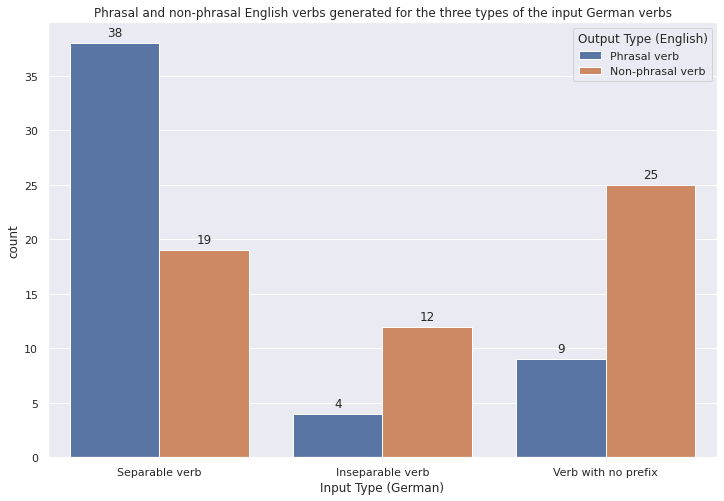

In [17]:
# countplot

sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,8))
count_graph = sns.countplot(x ='Input Type (German)', hue = "Output Type (English)", data = chi1)
plt.title('Phrasal and non-phrasal English verbs generated for the three types of the input German verbs')
for p in count_graph.patches:
  count_graph.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [18]:
# cross-tab in percents

table1 = pd.crosstab(chi1['Input Type (German)'], chi1['Output Type (English)'], normalize='index')

# re-ordering the table
table1 = table1[['Phrasal verb', 'Non-phrasal verb']]
table1 = table1.T
table1 = table1[['Separable verb', 'Inseparable verb', 'Verb with no prefix']]
table1 = table1.T
table1

Output Type (English),Phrasal verb,Non-phrasal verb
Input Type (German),,
Separable verb,0.666667,0.333333
Inseparable verb,0.250000,0.750000
Verb with no prefix,0.264706,0.735294


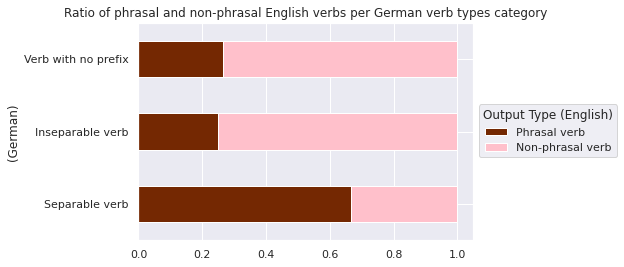

In [19]:
# horizontal bar plot

bar_graph = table1.plot.barh(stacked=True, color={"Phrasal verb": "#742802", "Non-phrasal verb": "pink"}).legend(title='Output Type (English)', bbox_to_anchor=(1, 0.65))
plt.title('Ratio of phrasal and non-phrasal English verbs per German verb types category')
plt.ylabel('(German)')
plt.show()

Test 1: variables *Input Type (German)*, *Output Type (English)*

In [20]:
# contingency table

table2 = pd.crosstab(chi1['Input Type (German)'], chi1['Output Type (English)']) 

# Re-ordering the table
table2 = table2[['Phrasal verb', 'Non-phrasal verb']]
table2 = table2.T
table2 = table2[['Separable verb', 'Inseparable verb', 'Verb with no prefix']]
table2 = table2.T
table2

Output Type (English),Phrasal verb,Non-phrasal verb
Input Type (German),,
Separable verb,38,19
Inseparable verb,4,12
Verb with no prefix,9,25


In [21]:
# combined contingency table

phrasal = [38, 13]
nonphrasal = [19, 37]
german = ['DE Separable Verb', 'DE Non-separable Verb']

table3 = pd.DataFrame(list(zip(phrasal, nonphrasal)), index = german, columns = ['EN Phrasal Verb', 'EN Non-Phrasal Verb'])
table3

,EN Phrasal Verb,EN Non-Phrasal Verb
DE Separable Verb,38,19
DE Non-separable Verb,13,37


In [25]:
# chi-square function

def chi_statistics(contingency_table):
  """receive contingency table, compute chi-square test for independence, interprete results"""
  
  print("CHI-SQUARE TEST FOR INDEPENDENCE")
  print()

  # test
  chi, p, dof, expected = chi2_contingency(contingency_table) 
  print(f"chi-square value:   {chi:.5g}")
  print(f"p-value:            {p:.5g}")
  print(f"degrees of freedom: {dof}")
  print()

  # interpretation
  alpha = 0.05
  chi2_critical = 3.84

  print("Chi-square value")
  if chi >= chi2_critical:
    print("The calculated chi-square value", str(chi), "is greater than/ equal to the critical value", chi2_critical, "=> reject H0, the variables are dependent.")
  else:
    print("The calculated chi-square value", str(chi), "is not greater than/ equal to the critical value", chi2_critical, "=> H0 holds true, the variables are independent.")
  print()

  print("p-value statistics")
  if p <= alpha:
      print("The p-value", str(p), "is not greater than the alpha value", alpha, "=> reject H0, the variables are dependent.")
  else:
      print("The p-value", str(p), "is greater than the alpha value", alpha, "=> H0 holds true, the variables are independent.")

In [27]:
# run test

chi_statistics(table3)

CHI-SQUARE TEST FOR INDEPENDENCE

chi-square value:   16.066
p-value:            6.1184e-05
degrees of freedom: 1

Chi-square value
The calculated chi-square value 16.065646561256077 is greater than/ equal to the critical value 3.84 => reject H0, the variables are dependent.

p-value statistics
The p-value 6.118396474808487e-05 is not greater than the alpha value 0.05 => reject H0, the variables are dependent.


Test 2: variables *Input: Is Separated?*, *Output Type (English)*

In [28]:
chi2 = chi1[chi1['Input Type (German)'] == 'Separable verb']
chi2.shape

(57, 7)

In [29]:
# contingency table

table4 = pd.crosstab(chi2['Input: Is Separated?'], chi2['Output Type (English)'])
table4

Output Type (English),Non-phrasal verb,Phrasal verb
Input: Is Separated?,,
No,10,23
Yes,9,15


In [30]:
# run test

chi_statistics(table4)

CHI-SQUARE TEST FOR INDEPENDENCE

chi-square value:   0.080966
p-value:            0.77599
degrees of freedom: 1

Chi-square value
The calculated chi-square value 0.08096590909090909 is not greater than/ equal to the critical value 3.84 => H0 holds true, the variables are independent.

p-value statistics
The p-value 0.7759926834094925 is greater than the alpha value 0.05 => H0 holds true, the variables are independent.
